In [48]:
import numpy as np
import pandas as pd

In [81]:
# max and min locations for streams

# load in the streamwater data
streamwater = pd.read_csv('data/streamflow_data/Final_Processed_Station_Data_Watershed.csv')
lats = np.float32(streamwater.iloc[0][1:])
lons = np.float32(streamwater.iloc[1][1:])

# get the max and min locations
max_lat = lats[np.argmax(lats)]
min_lat = lats[np.argmin(lats)]
max_lon = lons[np.argmax(lons)]
min_lon = lons[np.argmin(lons)]
spacing = 0.75

C:\Users\tbwil\AppData\Local\Temp\ipykernel_22864\4013660118.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or

In [50]:
# %pip install netCDF4
from netCDF4 import Dataset

# Define the path to the file
data_dir = 'data/rainfall_raw_data/'
file_path = data_dir + 'Rainf_WFDE5_CRU_201101_v2.1.nc'

# Load the data
test_data = Dataset(file_path)

# Display the data
print(test_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: WATCH Forcing Data methodology applied to ERA5 data
    institution: Copernicus Climate Change Service
    contact: http://copernicus-support.ecmwf.int
    comment: Methodology implementation for ERA5 and dataset production by B-Open Solutions for the Copernicus Climate Change Service in the context of contract C3S_25c
    Conventions: CF-1.7
    summary: ERA5 data regridded to half degree regular lat-lon; Genuine land points from CRU grid and ERA5 land-sea mask only; Rainf bias-corrected using CRU TS4.04 wet days & CRU TS4.04 precip totals, catch correction, and precip phase correction according to elevation and bias-corrected Tair
    reference: Cucchi et al., 2020, Earth Syst. Sci. Data, 12(3), 2097–2120, doi:10.5194/essd-12-2097-2020; Weedon et al., 2014, Water Resources Res., 50, 7505-7514, doi:10.1002/2014WR015638; Harris et al., 2020, Scientific Data, 7(1), doi:10.1038/s41597-020-045

In [51]:
test_data.variables.keys()

dict_keys(['lat', 'lon', 'time', 'Rainf'])

In [52]:
test_data.variables['lat'][:]

masked_array(data=[-89.75, -89.25, -88.75, -88.25, -87.75, -87.25, -86.75,
                   -86.25, -85.75, -85.25, -84.75, -84.25, -83.75, -83.25,
                   -82.75, -82.25, -81.75, -81.25, -80.75, -80.25, -79.75,
                   -79.25, -78.75, -78.25, -77.75, -77.25, -76.75, -76.25,
                   -75.75, -75.25, -74.75, -74.25, -73.75, -73.25, -72.75,
                   -72.25, -71.75, -71.25, -70.75, -70.25, -69.75, -69.25,
                   -68.75, -68.25, -67.75, -67.25, -66.75, -66.25, -65.75,
                   -65.25, -64.75, -64.25, -63.75, -63.25, -62.75, -62.25,
                   -61.75, -61.25, -60.75, -60.25, -59.75, -59.25, -58.75,
                   -58.25, -57.75, -57.25, -56.75, -56.25, -55.75, -55.25,
                   -54.75, -54.25, -53.75, -53.25, -52.75, -52.25, -51.75,
                   -51.25, -50.75, -50.25, -49.75, -49.25, -48.75, -48.25,
                   -47.75, -47.25, -46.75, -46.25, -45.75, -45.25, -44.75,
                   -44.25

In [53]:
lats = test_data.variables['lat'][:]
lats_mask = (lats >= min_lat - spacing) & (lats <= max_lat + spacing)

lons = test_data.variables['lon'][:]
lons_mask = (lons >= min_lon - spacing) & (lons <= max_lon + spacing)

lats_trim = lats[lats_mask]
lons_trim = lons[lons_mask]
print(len(lats_trim), len(lons_trim))

22 37


In [54]:
test_data.variables['time']

<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    standard_name: time
    long_name: Time
    axis: T
    units: hours since 1900-01-01
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (744,)
filling on, default _FillValue of -9223372036854775806 used

In [55]:
test_data.variables['Rainf']

<class 'netCDF4._netCDF4.Variable'>
float32 Rainf(time, lat, lon)
    _FillValue: 1e+20
    units: kg m-2 s-1
    long_name: Rainfall Flux
    standard_name: rainfall_flux
unlimited dimensions: 
current shape = (744, 360, 720)
filling on

In [56]:
test_time = test_data.variables['time'][:][0]

In [57]:
rainfall_interp = test_data.variables['Rainf'][:, lats_mask, :][:, :, lons_mask]

print(rainfall_interp.shape)

(744, 22, 37)


In [58]:
import datetime
# convert from hours since 1900-01-01 00:00:00 to a human-readable date
print(datetime.datetime.fromtimestamp(test_time))

1970-01-11 22:16:48


In [59]:
# Initialize time and rainfall arrays
times = np.array([])
rainfall = None  # Start with None, initialize after first file

# Get all files in the directory
import os
files = os.listdir(data_dir)

for file in files:
    data = Dataset(data_dir + file)

    # Append times
    times = np.append(times, data.variables['time'][:])

    # Initialize rainfall array if it's the first file
    if rainfall is None:
        rainfall = data.variables['Rainf'][:, lats_mask, :][:, :, lons_mask]
    else:
        # Concatenate along the first axis
        rainfall = np.concatenate((rainfall, data.variables['Rainf'][:, lats_mask, :][:, :, lons_mask]), axis=0)
    
    print(f"completed {file}. Dataset shape: {rainfall.shape}")

completed Rainf_WFDE5_CRU_201101_v2.1.nc. Dataset shape: (744, 22, 37)
completed Rainf_WFDE5_CRU_201102_v2.1.nc. Dataset shape: (1416, 22, 37)
completed Rainf_WFDE5_CRU_201103_v2.1.nc. Dataset shape: (2160, 22, 37)
completed Rainf_WFDE5_CRU_201104_v2.1.nc. Dataset shape: (2880, 22, 37)
completed Rainf_WFDE5_CRU_201105_v2.1.nc. Dataset shape: (3624, 22, 37)
completed Rainf_WFDE5_CRU_201106_v2.1.nc. Dataset shape: (4344, 22, 37)
completed Rainf_WFDE5_CRU_201107_v2.1.nc. Dataset shape: (5088, 22, 37)
completed Rainf_WFDE5_CRU_201108_v2.1.nc. Dataset shape: (5832, 22, 37)
completed Rainf_WFDE5_CRU_201109_v2.1.nc. Dataset shape: (6552, 22, 37)
completed Rainf_WFDE5_CRU_201110_v2.1.nc. Dataset shape: (7296, 22, 37)
completed Rainf_WFDE5_CRU_201111_v2.1.nc. Dataset shape: (8016, 22, 37)
completed Rainf_WFDE5_CRU_201112_v2.1.nc. Dataset shape: (8760, 22, 37)
completed Rainf_WFDE5_CRU_201201_v2.1.nc. Dataset shape: (9504, 22, 37)
completed Rainf_WFDE5_CRU_201202_v2.1.nc. Dataset shape: (10200, 

In [60]:
np.max(rainfall)

1e+20

In [61]:
import numpy as np

# Replace values above 1e20 with NaN to mark missing data
rainfall_interp = np.where(rainfall >= 1e20, 0, rainfall)

In [62]:
np.max(rainfall_interp), np.min(rainfall_interp)

(0.0033826297, 0.0)

In [63]:
num_time_steps = rainfall_interp.shape[0]

# Reshape to group time steps in chunks of 24, and then sum along the new axis
rain_test_daily_sum = rainfall_interp.reshape(-1, 24, rainfall_interp.shape[1], rainfall_interp.shape[2]).sum(axis=1)

print(rain_test_daily_sum.shape)

(3287, 22, 37)


In [64]:
# convert the time values from hours since 1900-01-01 00:00:00 to a human-readable date
import datetime

ref_date = datetime.datetime(1900, 1, 1)

times_modified = [ref_date + datetime.timedelta(hours=int(time)) for time in times]
formatted_dates = [date.strftime("%Y-%m-%d") for date in times_modified][::24]
formatted_dates

['2011-01-01',
 '2011-01-02',
 '2011-01-03',
 '2011-01-04',
 '2011-01-05',
 '2011-01-06',
 '2011-01-07',
 '2011-01-08',
 '2011-01-09',
 '2011-01-10',
 '2011-01-11',
 '2011-01-12',
 '2011-01-13',
 '2011-01-14',
 '2011-01-15',
 '2011-01-16',
 '2011-01-17',
 '2011-01-18',
 '2011-01-19',
 '2011-01-20',
 '2011-01-21',
 '2011-01-22',
 '2011-01-23',
 '2011-01-24',
 '2011-01-25',
 '2011-01-26',
 '2011-01-27',
 '2011-01-28',
 '2011-01-29',
 '2011-01-30',
 '2011-01-31',
 '2011-02-01',
 '2011-02-02',
 '2011-02-03',
 '2011-02-04',
 '2011-02-05',
 '2011-02-06',
 '2011-02-07',
 '2011-02-08',
 '2011-02-09',
 '2011-02-10',
 '2011-02-11',
 '2011-02-12',
 '2011-02-13',
 '2011-02-14',
 '2011-02-15',
 '2011-02-16',
 '2011-02-17',
 '2011-02-18',
 '2011-02-19',
 '2011-02-20',
 '2011-02-21',
 '2011-02-22',
 '2011-02-23',
 '2011-02-24',
 '2011-02-25',
 '2011-02-26',
 '2011-02-27',
 '2011-02-28',
 '2011-03-01',
 '2011-03-02',
 '2011-03-03',
 '2011-03-04',
 '2011-03-05',
 '2011-03-06',
 '2011-03-07',
 '2011-03-

In [65]:
assert len(formatted_dates) == rain_test_daily_sum.shape[0]

In [66]:
np.save('data/weather_data/rainfall_data.npy', np.array(rain_test_daily_sum))
np.save('data/weather_data/dates.npy', np.array(formatted_dates))
np.save('data/weather_data/lats.npy', np.array(lats_trim))
np.save('data/weather_data/lons.npy', np.array(lons_trim))

In [67]:
rain = np.load('data/weather_data/rainfall_data.npy')
np.mean(rain), np.max(rain), np.min(rain)

(0.00037812625, 0.041315977, 0.0)

# Do this for snowfall data

In [68]:
import numpy as np
from netCDF4 import Dataset

In [82]:
# load in the streamwater data
streamwater = pd.read_csv('data/streamflow_data/Final_Processed_Station_Data_Watershed.csv')
lats = np.float32(streamwater.iloc[0][1:])
lons = np.float32(streamwater.iloc[1][1:])

# get the max and min locations
max_lat = lats[np.argmax(lats)]
min_lat = lats[np.argmin(lats)]
max_lon = lons[np.argmax(lons)]
min_lon = lons[np.argmin(lons)]
spacing = 0.75

data_dir = 'data/snowfall_raw_data/'

C:\Users\tbwil\AppData\Local\Temp\ipykernel_22864\3745838770.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or

In [83]:
test_data = Dataset(data_dir + 'Snowf_WFDE5_CRU_201101_v2.1.nc')
test_data.variables.keys()

dict_keys(['lat', 'lon', 'time', 'Snowf'])

In [84]:
lats = test_data.variables['lat'][:]
lats_mask = (lats >= min_lat - spacing) & (lats <= max_lat + spacing)

lons = test_data.variables['lon'][:]
lons_mask = (lons >= min_lon - spacing) & (lons <= max_lon + spacing)

lats_trim = lats[lats_mask]
lons_trim = lons[lons_mask]
print(len(lats_trim), len(lons_trim))

22 37


In [85]:
# Initialize time and rainfall arrays
times = np.array([])
snowfall = None  # Start with None, initialize after first file

# Get all files in the directory
import os
files = os.listdir(data_dir)

for file in files:
    data = Dataset(data_dir + file)

    # Append times
    times = np.append(times, data.variables['time'][:])

    # Initialize rainfall array if it's the first file
    if snowfall is None:
        snowfall = data.variables['Snowf'][:, lats_mask, :][:, :, lons_mask]
    else:
        # Concatenate along the first axis
        snowfall = np.concatenate((snowfall, data.variables['Snowf'][:, lats_mask, :][:, :, lons_mask]), axis=0)
    
    print(f"completed {file}. Dataset shape: {snowfall.shape}")

completed Snowf_WFDE5_CRU_201101_v2.1.nc. Dataset shape: (744, 22, 37)
completed Snowf_WFDE5_CRU_201102_v2.1.nc. Dataset shape: (1416, 22, 37)
completed Snowf_WFDE5_CRU_201103_v2.1.nc. Dataset shape: (2160, 22, 37)
completed Snowf_WFDE5_CRU_201104_v2.1.nc. Dataset shape: (2880, 22, 37)
completed Snowf_WFDE5_CRU_201105_v2.1.nc. Dataset shape: (3624, 22, 37)
completed Snowf_WFDE5_CRU_201106_v2.1.nc. Dataset shape: (4344, 22, 37)
completed Snowf_WFDE5_CRU_201107_v2.1.nc. Dataset shape: (5088, 22, 37)
completed Snowf_WFDE5_CRU_201108_v2.1.nc. Dataset shape: (5832, 22, 37)
completed Snowf_WFDE5_CRU_201109_v2.1.nc. Dataset shape: (6552, 22, 37)
completed Snowf_WFDE5_CRU_201110_v2.1.nc. Dataset shape: (7296, 22, 37)
completed Snowf_WFDE5_CRU_201111_v2.1.nc. Dataset shape: (8016, 22, 37)
completed Snowf_WFDE5_CRU_201112_v2.1.nc. Dataset shape: (8760, 22, 37)
completed Snowf_WFDE5_CRU_201201_v2.1.nc. Dataset shape: (9504, 22, 37)
completed Snowf_WFDE5_CRU_201202_v2.1.nc. Dataset shape: (10200, 

In [86]:
# Replace values above 1e20 with NaN to mark missing data
snowfall_interp = np.where(snowfall >= 1e20, 0, snowfall)

num_time_steps = snowfall_interp.shape[0]

# Reshape to group time steps in chunks of 24, and then sum along the new axis
snow_test_daily_sum = snowfall_interp.reshape(-1, 24, snowfall_interp.shape[1], snowfall_interp.shape[2]).sum(axis=1)

print(snow_test_daily_sum.shape)

(3287, 22, 37)


In [87]:
np.save('data/weather_data/snowfall_data.npy', np.array(snow_test_daily_sum))

# Do this for temperature data

In [95]:
import numpy as np
from netCDF4 import Dataset

In [96]:
# load in the streamwater data
streamwater = pd.read_csv('data/streamflow_data/Final_Processed_Station_Data_Watershed.csv')
lats = np.float32(streamwater.iloc[0][1:])
lons = np.float32(streamwater.iloc[1][1:])

# get the max and min locations
max_lat = lats[np.argmax(lats)]
min_lat = lats[np.argmin(lats)]
max_lon = lons[np.argmax(lons)]
min_lon = lons[np.argmin(lons)]
spacing = 0.75

data_dir = 'data/temperature_raw_data/'

C:\Users\tbwil\AppData\Local\Temp\ipykernel_22864\3310231095.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or

In [97]:
test_data = Dataset(data_dir + 'Tair_WFDE5_CRU_201101_v2.1.nc')
test_data.variables.keys()

dict_keys(['time', 'lon', 'lat', 'Tair'])

In [98]:
lats = test_data.variables['lat'][:]
lats_mask = (lats >= min_lat - spacing) & (lats <= max_lat + spacing)

lons = test_data.variables['lon'][:]
lons_mask = (lons >= min_lon - spacing) & (lons <= max_lon + spacing)

lats_trim = lats[lats_mask]
lons_trim = lons[lons_mask]
print(len(lats_trim), len(lons_trim))

22 37


In [99]:
# Initialize time and rainfall arrays
times = np.array([])
temp = None  # Start with None, initialize after first file

# Get all files in the directory
import os
files = os.listdir(data_dir)

for file in files:
    data = Dataset(data_dir + file)

    # Append times
    times = np.append(times, data.variables['time'][:])

    # Initialize rainfall array if it's the first file
    if temp is None:
        temp = data.variables['Tair'][:, lats_mask, :][:, :, lons_mask]
    else:
        # Concatenate along the first axis
        temp = np.concatenate((temp, data.variables['Tair'][:, lats_mask, :][:, :, lons_mask]), axis=0)
    
    print(f"completed {file}. Dataset shape: {temp.shape}")

completed Tair_WFDE5_CRU_201101_v2.1.nc. Dataset shape: (744, 22, 37)
completed Tair_WFDE5_CRU_201102_v2.1.nc. Dataset shape: (1416, 22, 37)
completed Tair_WFDE5_CRU_201103_v2.1.nc. Dataset shape: (2160, 22, 37)
completed Tair_WFDE5_CRU_201104_v2.1.nc. Dataset shape: (2880, 22, 37)
completed Tair_WFDE5_CRU_201105_v2.1.nc. Dataset shape: (3624, 22, 37)
completed Tair_WFDE5_CRU_201106_v2.1.nc. Dataset shape: (4344, 22, 37)
completed Tair_WFDE5_CRU_201107_v2.1.nc. Dataset shape: (5088, 22, 37)
completed Tair_WFDE5_CRU_201108_v2.1.nc. Dataset shape: (5832, 22, 37)
completed Tair_WFDE5_CRU_201109_v2.1.nc. Dataset shape: (6552, 22, 37)
completed Tair_WFDE5_CRU_201110_v2.1.nc. Dataset shape: (7296, 22, 37)
completed Tair_WFDE5_CRU_201111_v2.1.nc. Dataset shape: (8016, 22, 37)
completed Tair_WFDE5_CRU_201112_v2.1.nc. Dataset shape: (8760, 22, 37)
completed Tair_WFDE5_CRU_201201_v2.1.nc. Dataset shape: (9504, 22, 37)
completed Tair_WFDE5_CRU_201202_v2.1.nc. Dataset shape: (10200, 22, 37)
comple

In [100]:
# Replace values above 1e20 with NaN to mark missing data
temp_interp = np.where(temp >= 1e20, 0, temp)

num_time_steps = temp_interp.shape[0]

# Reshape to group time steps in chunks of 24, and then sum along the new axis
temp_max = temp_interp.reshape(-1, 24, temp_interp.shape[1], temp_interp.shape[2]).max(axis=1)
temp_min = temp_interp.reshape(-1, 24, temp_interp.shape[1], temp_interp.shape[2]).min(axis=1)

print(temp_max.shape)

(3287, 22, 37)


In [101]:
np.save('data/weather_data/max_temp_data.npy', np.array(temp_max))
np.save('data/weather_data/min_temp_data.npy', np.array(temp_min))

# Plot the data

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [103]:
# load in the streamwater data
streamwater = pd.read_csv('data/streamflow_data/Final_Processed_Station_Data_Watershed.csv')
lats = np.float32(streamwater.iloc[0][1:])
lons = np.float32(streamwater.iloc[1][1:])

C:\Users\tbwil\AppData\Local\Temp\ipykernel_22864\3367167158.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or

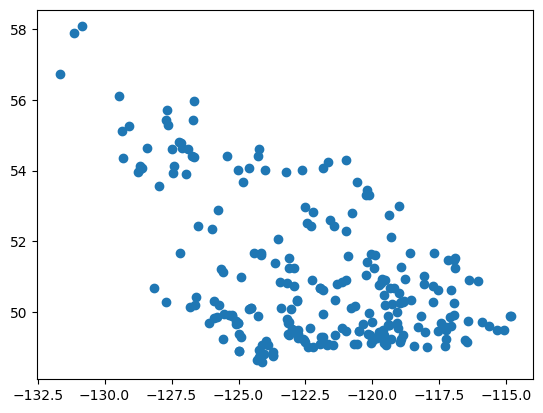

In [77]:
# plot the locations of the streamwater data
plt.scatter(lons, lats)
plt.show()

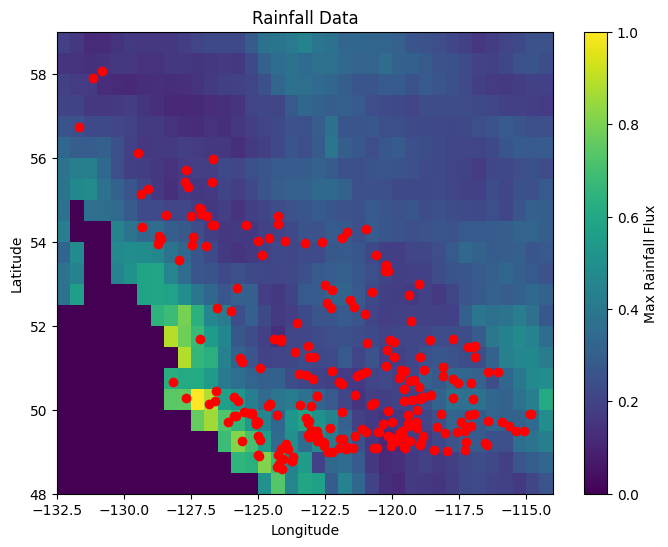

In [104]:
measured_lats = np.load('data/weather_data/lats.npy')
measured_lons = np.load('data/weather_data/lons.npy')

# plot a color map of the max rainfall at each measured location
rain = np.load('data/weather_data/rainfall_data.npy')
rain_max = np.max(rain, axis=0)

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(measured_lons, measured_lats, rain_max, cmap='viridis', shading='auto')
plt.scatter(lons, lats, c='red')
plt.colorbar(label='Max Rainfall Flux')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rainfall Data')
plt.show()


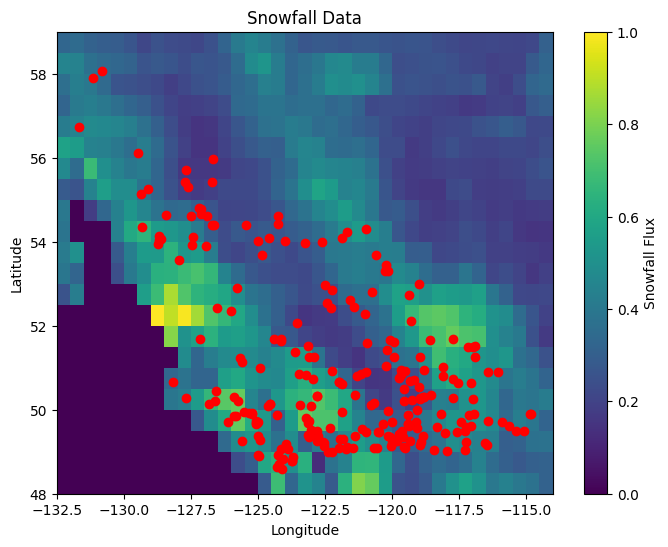

In [93]:
# do this for snowfall
snow = np.load('data/weather_data/snowfall_data.npy')
snow_max = np.max(snow, axis=0)

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(measured_lons, measured_lats, snow_max, cmap='viridis', shading='auto')
plt.scatter(lons, lats, c='red')
plt.colorbar(label='Snowfall Flux')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Snowfall Data')
plt.show()

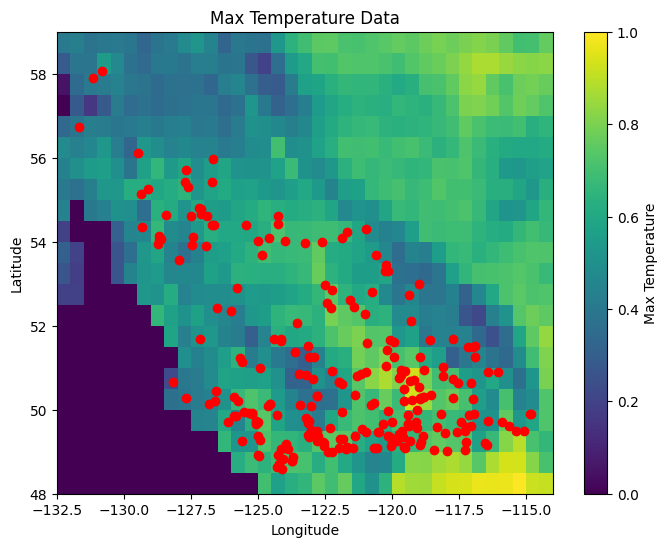

In [112]:
# do this for max temperature
temp_max = np.load('data/weather_data/max_temp_data.npy')
temp_max_max = np.max(temp_max, axis=0) - 273.15

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(measured_lons, measured_lats, temp_max_max, cmap='viridis', vmin=20, shading='auto')
plt.scatter(lons, lats, c='red')
plt.colorbar(label='Max Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Max Temperature Data')
plt.show()

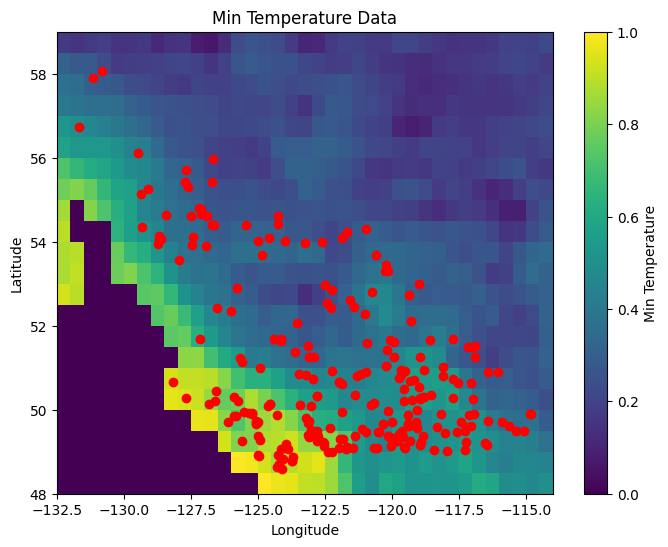

In [114]:
# do this for min temperature
temp_min = np.load('data/weather_data/min_temp_data.npy')
temp_min_min = np.min(temp_min, axis=0) - 273.15

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(measured_lons, measured_lats, temp_min_min, cmap='viridis', vmin=-50, shading='auto')
plt.scatter(lons, lats, c='red')
plt.colorbar(label='Min Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Min Temperature Data')
plt.show()